In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import regressions as reg
import numpy as np
sns.set_theme()
energy_table = pd.read_csv('../BDD/energy.csv', sep=';')
energy_table = energy_table[energy_table.Code=='CHN']
gdp_table = pd.read_csv('../BDD/gdp-per-capita-maddison-2020.csv')
gdp_table = gdp_table[gdp_table.Code=='CHN']
pop_table = pd.read_csv('../BDD/population.csv')
pop_table = pop_table[pop_table.Code=='CHN']
CH_table = pd.merge(gdp_table, pop_table, on=['Year'])
CH_table = pd.merge(CH_table, energy_table, on=['Year'])

In [3]:
pop = CH_table['Total population (Gapminder, HYDE & UN)']
gdp = CH_table['GDP per capita']*pop
energy = CH_table['Primary energy consumption (TWh)']
year = CH_table['Year']
yplot = np.linspace(year.min(), year.max(), 200)

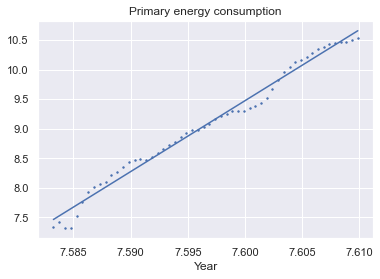

In [4]:

plt.scatter(np.log(year), np.log(energy), s=2) 
plt.xlabel('Year')
plt.title('Primary energy consumption')

r, y0 = reg.linReg(np.log(year), np.log(energy))
plt.plot(np.log(yplot), reg.lin_fun(np.log(yplot),y0, r ))

285.0221739710789 -559226.0852424174 1800 500 1 2000 2013 2200


Text(0, 0.5, 'Energy TWh')

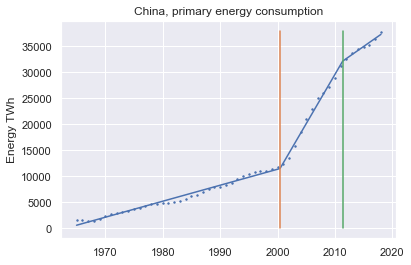

In [5]:
import math as math
plt.scatter(year, energy, s=2)
a, b = reg.linReg(year[:30], energy[:30])
a,b, c, e, g, x1, x2, x3 = a, b, 1800, 500, 1, 2000, 2013, 2200
print(a,b, c, e, g, x1, x2, x3)
a,b, c, e, g, x1, x2, x3 = reg.LLLL(year, energy, p0 =(a,b, c, e, g, x1, x2, x3 ), bounds = [-60000000, 90000000])
plt.plot(yplot, reg.llll(yplot, a,b, c, e, g, x1, x2, x3 ))
plt.plot([x1, x1], [0, 38000], label=str(int(x1)))
plt.plot([x2, x2], [0, 38000], label=str(int(x2)))
plt.title('China, primary energy consumption')
plt.ylabel("Energy TWh")


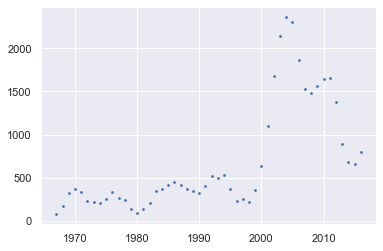

In [6]:
def derivee(t, y) :
    der = []
    n=len(t)-2
    for i in range(2,n) : 
        der.append((y[i+2]-y[i-2])/(t[i+2]-t[i-2]))
    return t[2:n], np.array(der)

t, d = derivee(year, energy)
plt.scatter(t,d, s=3)


Text(0, 0.5, '10e12 $')

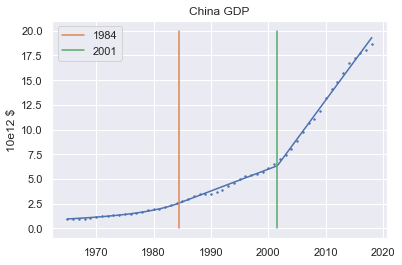

In [7]:
plt.scatter(year, gdp/10**12, s=2)
plt.title('China GDP')
b,c,d,f,x1,x2 = 12, 1983,0.033,0.025,1971,2009
# plt.plot(yplot, reg.hyp_lin_lin(yplot,b,c,d,f,x1,x2 ))
b,c,d,f,x1,x2 = reg.hypLinLin (year, gdp/10**12, p0=(b,c,d,f,x1,x2), bounds = [-2, 2100])
plt.plot(yplot, reg.hyp_lin_lin(yplot,b,c,d,f,x1,x2 ))
plt.plot([x1, x1], [0, 20], label=str(int(x1)))
plt.plot([x2, x2], [0, 20], label=str(int(x2)))
plt.legend()
plt.ylabel('10e12 $')

(3.6399105472716804, 0.08375788, 9.999725341796875, 0.004000262476776352, 0.002743775300274649, -0.001016068232135207)


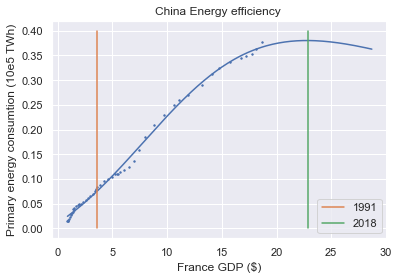

In [8]:
g= gdp/10**12
e = energy/10**5
gplot = np.linspace(g.min(), g.max()+10, 200)
plt.scatter(g,e, s= 2)
plt.xlabel('France GDP ($)')
plt.ylabel('Primary energy consumtion (10e5 TWh)')
plt.title('China Energy efficiency ')
G_i, E_i, A, a1, a2, a3 = reg.sReg(g,e, bounds= [-0.01,3775300274660])
plt.plot(gplot, reg.s_model(gplot,G_i, E_i, A, a1, a2, a3 ))
inf_dist = np.array([abs(g[i]-3.6399105472716804) for i in range(len(g))])
year_infl = year[inf_dist.argmin()]
plt.plot([3.6399105472716804, 3.6399105472716804],[0.0, 0.4], label = str(year_infl))

e_max = reg.s_model(gplot,G_i, E_i, A, a1, a2, a3 ).argmax()
max_dist = np.array([abs(g[i]-gplot[e_max]) for i in range(len(g))])
year_max = year[max_dist.argmin()]
plt.plot([gplot[e_max], gplot[e_max]], [0.0, 0.4], label = str(year_max)) 
plt.legend()

Text(0, 0.5, '10e-9 TWh/$')

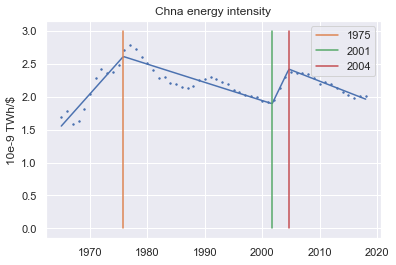

In [9]:
plt.scatter(year,(energy/gdp)*10**9, s=2)
a,b, c, e, g, x1, x2, x3 = 0.2, -394, -0.05, 0.8, -0.3, 1976, 2002,2006
a,b, c, e, g, x1, x2, x3 = reg.LLLL(year, (energy/gdp)*10**9, p0 = (0.2, -394, -0.05, 0.8, -0.3, 1976, 2002,2006)) 
plt.plot(yplot, reg.llll(yplot, a,b, c, e, g, x1, x2, x3))
plt.plot([x1, x1], [0, 3], label=str(int(x1)))
plt.plot([x2, x2], [0, 3], label=str(int(x2)))
plt.plot([x3, x3], [0, 3], label=str(int(x3)))
plt.legend()
plt.title("Chna energy intensity")
plt.ylabel("10e-9 TWh/$")


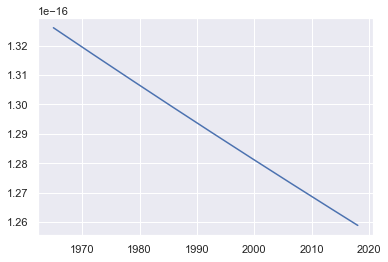